# SMOG

![alt text](SMOG_PM10.jpg)


## Dopuszczalne zanieczyszczenie powietrzaa
  

Zanieczyszczenie        | 1 godzina | 8 godzin     | 24 godziny | 1 rok kalendarzowy | 
------------------------|-----------|--------------|------------|--------------------|
NO (tlenek azotu)       | -         | -            |-           | 30 µg/m3           |
NO2 (dwutlenek azotu)   | 200 µg/m3 | -            |-           | 40 µg/m3           |
SO2 (tlenek siarki(IV)) | 350 µg/m3 | -            |-           | 20 µg/m3           |
CO  (tlenek węgla)      | -         | 10 000 µg/m3 |-           | -                  |
PM10                    | -         | -            | 50 µg/m3   | 40 µg/m3           |
PM2,5                   | -         | -            |-           | 25 µg/m3           |

Trudno opadające pyły:

 * Pył PM10 – cząstki o średnicy do 10 µm. Utrzymują się w atmosferze do kilku godzin. Pył zawieszony w powietrzu może być zbudowany, w zależności od warunków powstawania, z cząstek dymu, sadzy, popiołu, związków nieorganicznych (np. azbestu), a także metali. Powstaje przede wszystkim w procesach spalania paliw stałych i ciekłych.
 * Pył PM2,5 – cząstki o średnicy mniejszej niż 2,5 µm. Bardziej niebezpieczny od pyłu PM10, ponieważ ma zdolność przenikania przez pęcherzyki płucne, dostając się do krwiobiegu. Powoduje ogólne osłabienie układu oddechowego zwiększając zachorowalność na astmę, alergię, POChP (przewlekłą obturacyjną chorobę płuc). Wpływa szkodliwie na układ krwionośny przyczyniając się do wzrostu liczby arytmii oraz zawałów serca.


Dane dotyczące dopuszczalnych stężeń związków chemicznych i pyłów w powietrzy pochodzą ze strony [http://armaag.gda.pl/powietrze_02.htm](http://armaag.gda.pl/powietrze_02.htm)


## Dane o stacjach warszawskich

Warning message:
"package 'ggmap' was built under R version 3.3.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.2"Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=52.243498,21.019882&zoom=11&size=640x640&scale=2&maptype=terrain&language=pl&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ul.%20anieli%20krzywo%C5%84,%20warszawa&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=al.%20niepodleg%C5%82o%C5%9Bci%20227/233,%20warszawa&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ul.%20kondratowicza%208,%20warszawa&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ul.%20marsza%C5%82kowska%2068,%20warszawa&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ul.%20podle%C5%9Bna%2061,%20warszawa&sensor=false
I

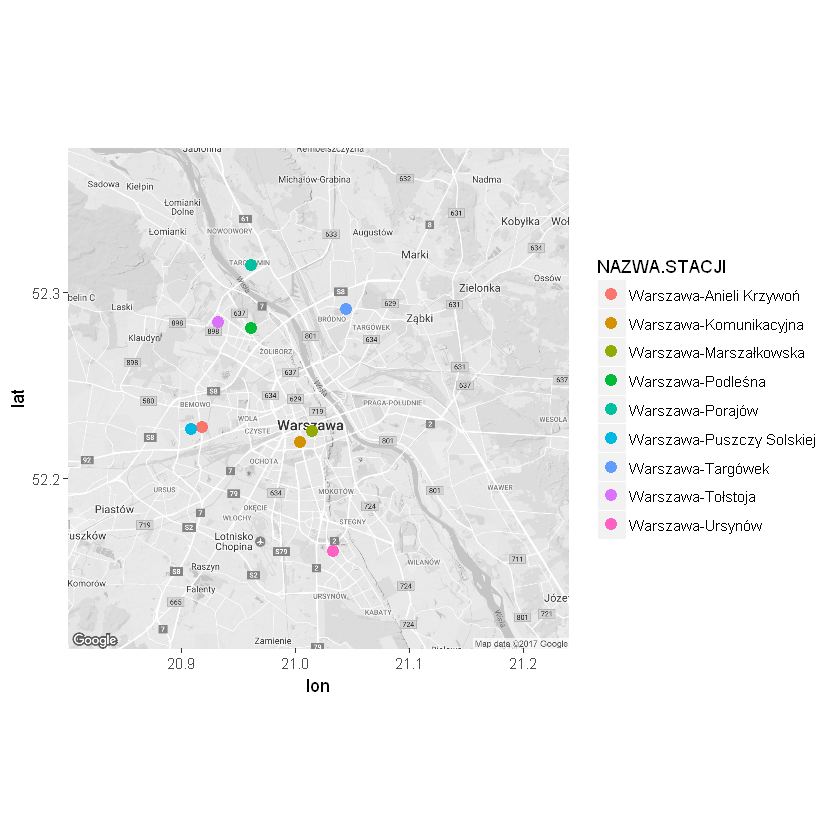

In [1]:
stacje<-read.csv2("../Kopia Kody_stacji_pomiarowych.csv", encoding = "UTF-8")
library( ggmap)
library( ggplot2)

# warszawa<-get_map( location = "warsaw", zoom = 13, maptype = 'terrain', language = "pl",  color="bw")
warszawa<-get_map( location = c( 21.019882, 52.243498), zoom = 11, maptype = 'terrain', language = "pl",  color="bw")
warszawa = ggmap(warszawa)

stacje$adres_mapa<-paste( stacje$ADRES, stacje$MIEJSCOWOSC, sep=", ")
stacje$adres_mapa[ substring( stacje$adres_mapa,1,2)==", "]<-paste( stacje$MIEJSCOWOSC[ substring( stacje$adres_mapa,1,2)==", "], stacje$WOJEWÓDZTWO[ substring( stacje$adres_mapa,1,2)==", "], sep=", ")

stacje_adres_mapa<-tolower(stacje$adres_mapa)
stacje_adres_mapa<-stringi::stri_enc_toutf8(stacje_adres_mapa)
stacje_adres_mapa_wspolrzedne_warszawa<-geocode(stacje_adres_mapa[ grep(pattern = "warszawa",stacje_adres_mapa)])
stacje<-data.frame( stacje, lon=NA, lat=NA)
stacje$lon[ tolower(stacje$MIEJSCOWOSC)=="warszawa" ]<-stacje_adres_mapa_wspolrzedne_warszawa$lon
stacje$lat[ tolower(stacje$MIEJSCOWOSC)=="warszawa" ]<-stacje_adres_mapa_wspolrzedne_warszawa$lat
warszawa+
  geom_point(data=stacje[tolower(stacje$MIEJSCOWOSC)=="warszawa",], aes(x=lon, y=lat, col=NAZWA.STACJI), size =3)

# Dane o smogu

Dane ze wszystkich stacji pomiarowych w Polsce o pomiarach co 1 godzinę wszystkich zanieczyszczeń.

In [2]:
pliki<-list.files(path = "../SMOG_dane/", pattern = "\\.(csv|CSV)$")
pliki<-pliki[order(pliki)]
smog<-list()
for (P in pliki){
  nazwy_zmiennych<-read.csv2(paste("../SMOG_dane/", P, sep=""), header = F, nrows = 1, as.is = T)
  dane<-read.csv2(paste("../SMOG_dane/", P, sep=""), skip = 3,header = FALSE )
  colnames(dane)<-nazwy_zmiennych
  smog[[which(pliki==P)]]<-dane
  names(smog )[which(pliki==P)]<-P
}
# zmiana nazwy pierwszej kolumny (daty)
smog<-lapply( smog, FUN=function(x){ 
  colnames( x)[ colnames(x)=="Kod stacji"]<-"DATA"
  x
})

DATA,DsCzer02,DsJelw05,MpKrakowWIOSAKra6117,MpKrakowWIOSBulw6118,MpKrakowWIOSPrad6115,MzBelskIGFPAN,Pm.a01a,Pm.a02a,Pm.a03a,Pm.a04a,Pm.a06a,Pm.a07a,Pm.a08a,Pm.a09a,SlBytomByto_modrz,SlSosnoSosn_narut,WpKonin311009D009102
01.01.2000 01:00,NA,NA,NA,NA,NA,NA,25,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01.01.2000 02:00,6,14,62,48,38,NA,24,27,13,11,13,7,11,10,55,55,NA
01.01.2000 03:00,3,12,56,47,37,NA,25,20,13,11,15,7,12,10,52,53,NA


## Dane o smogu ze stacji warszawskich

Wybór danych ze stacji warszawskich

In [3]:
stacje<-read.csv2("../Kopia Kody_stacji_pomiarowych.csv", encoding = "UTF-8")
stacje_warszawa_stare_nowe_kody<-c(
  as.character(stacje$KOD.NOWY[stacje$MIEJSCOWOSC=="Warszawa"]),
  as.character(stacje$KOD.STARY[stacje$MIEJSCOWOSC=="Warszawa"])
)
warszawa_filtry<-lapply(lapply(smog, colnames), "%in%", stacje_warszawa_stare_nowe_kody)
smog_warszawa<-lapply(warszawa_filtry, sum)>0
smog_warszawa<-smog[smog_warszawa]
# czyszczenie smog_warszawa z niewarszawy
smog_warszawa<-lapply(smog_warszawa, FUN = function(x){
  x[ , colnames(x) %in% c("DATA",stacje_warszawa_stare_nowe_kody)]
})
smog_warszawa_rok_zwiazek<-data.frame(
  rok=gsub( "Kopia |_.*", "", names(smog_warszawa)),
  zwiazek=gsub( "_.*", "", gsub( ".*0[0-1][0-9]_", "", names(smog_warszawa)))
)

Wybór zanieczyszczeń: NO2, CO, SO2, PM10 oraz PM2.5

In [4]:
## badanie stężenie dwytlenku azotu w warszawie
smog_warszawa_NO2<-smog_warszawa[grep("_NO2_", names(smog_warszawa))] # dwutlenek azotu
smog_warszawa_CO<-smog_warszawa[grep("_CO_", names(smog_warszawa))] # czad - tlenek wegla
smog_warszawa_SO2<-smog_warszawa[grep("_SO2_", names(smog_warszawa))] # dwutlenek siarki
smog_warszawa_PM10<-smog_warszawa[grep("_PM10_", names(smog_warszawa))] # pyly 
smog_warszawa_PM2.5<-smog_warszawa[grep("_PM2.5_", names(smog_warszawa))] # pyly drobne

Funkcje służące do opracowania danych.

In [5]:
# Funkcja do ujednolicania nazw
ujednolicenie_nazw<-function(lista_zbiorow, stare_nazwy, nowe_nazwy){
  if ( class( lista_zbiorow)!="list") {
    print("Bląd - obiekt wsadowy z danymi nie jest lista")
    break
  } else {
    if ( !all( unlist(lapply(lista_zbiorow, class ))=="data.frame"   ) ){
      print("Bląd - lista wsadowa nie zawiera obiektow typu data.frame ")
      break
    } else {
        liczba_zbiorow<-length(lista_zbiorow)
        for (Z in 1:liczba_zbiorow){
          nazwy_stacji<-colnames( lista_zbiorow[[Z]])
          for (N in 1:length( nazwy_stacji)){
            zastepowana<-stare_nazwy==nazwy_stacji[N]
            if ( sum(zastepowana)==1 ){
              zastepowana<-nowe_nazwy[zastepowana]
              colnames( lista_zbiorow[[Z]])[N]<-zastepowana
            }
          }
        }
    }
  }
  return( lista_zbiorow)
}
# do kazdego roku trzeba dodac stacje ktore prowadzily pomiar w innych latach
dodawanie_stacji<-function( lista_zbiorow){
    if ( class( lista_zbiorow)!="list") {
    print("Bląd - obiekt wsadowy z danymi nie jest lista")
    break
    } else {
      if ( !all( unlist(lapply(lista_zbiorow, class ))=="data.frame"   ) ) {
        print("Bląd - lista wsadowa nie zawiera obiektow typu data.frame ")
        break
      } else {
        stacje_mierzace_wszystkie<-unique(unlist( lapply(lista_zbiorow, colnames )))
        stacje_mierzace_wszystkie<-stacje_mierzace_wszystkie[stacje_mierzace_wszystkie!="DATA"] # kolumny z data
        nowa_lista_zbiorow<-list()
        for (Z in 1:length( lista_zbiorow)){
          stacje_mierzace_wybrane<-colnames( lista_zbiorow[[Z]])[colnames( lista_zbiorow[[Z]])!="DATA"]
          nowa_lista_zbiorow[[Z]]<-data.frame(lista_zbiorow[[Z]]$DATA, matrix(NA, dim(lista_zbiorow[[Z]])[1], length(stacje_mierzace_wszystkie) ))
          colnames(nowa_lista_zbiorow[[Z]])<- c("DATA",stacje_mierzace_wszystkie)
            for (S in stacje_mierzace_wybrane){
              nowa_lista_zbiorow[[Z]][,colnames( nowa_lista_zbiorow[[Z]]) ==S]<-lista_zbiorow[[Z]][,colnames( lista_zbiorow[[Z]]) ==S]
            }
        }
      }
    }
  names( nowa_lista_zbiorow)<-names(lista_zbiorow )
  return(nowa_lista_zbiorow)
}
# transformacja dat
transformacja_daty<-function( zbior){
  zbior$rok<-gsub( ".*[0-9]\\.| [0-9].*", ""  ,zbior$DATA)
  zbior$miesiac<-gsub(".*[0-9]\\.","", gsub( "\\.2[0-9].*", ""  ,zbior$DATA))
  zbior$dzien<-gsub("\\..*","", zbior$DATA)
  zbior$godzina<-gsub(".* |:.*","", zbior$DATA)
  zbior$minuta<-gsub(".*:","", zbior$DATA)
  # przeksztalcenie dat na potrzeby wykresu
  zbior$data_pelna<-strptime(paste(paste( zbior$rok, zbior$miesiac, zbior$dzien, sep="."), paste(zbior$godzina, zbior$minuta, sep=":")), "%Y.%m.%d %H:%M")
  zbior
}

# NO2


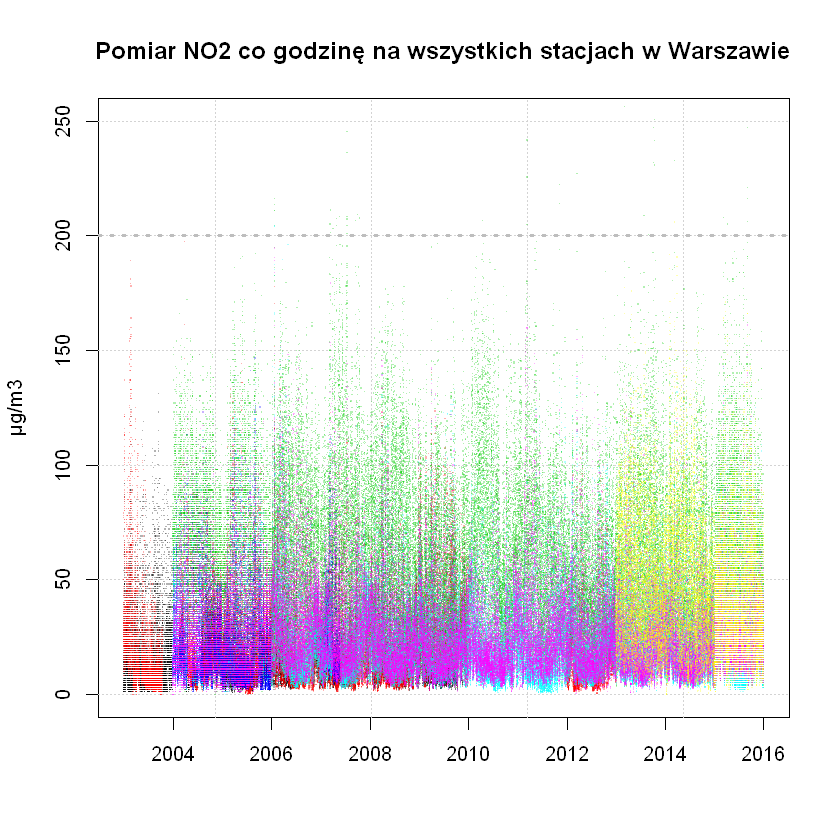

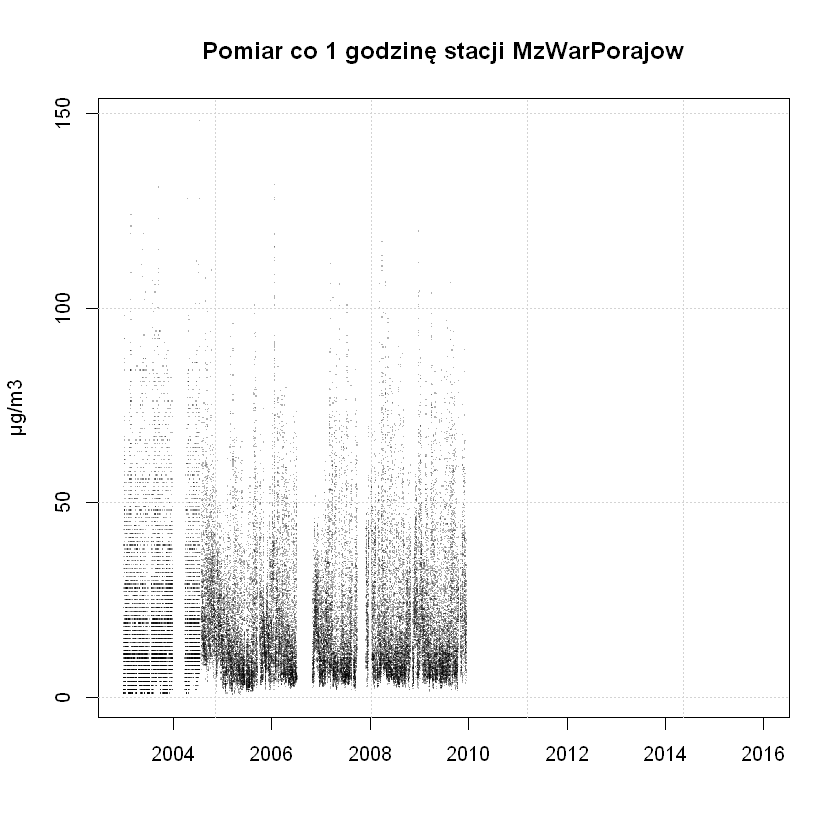

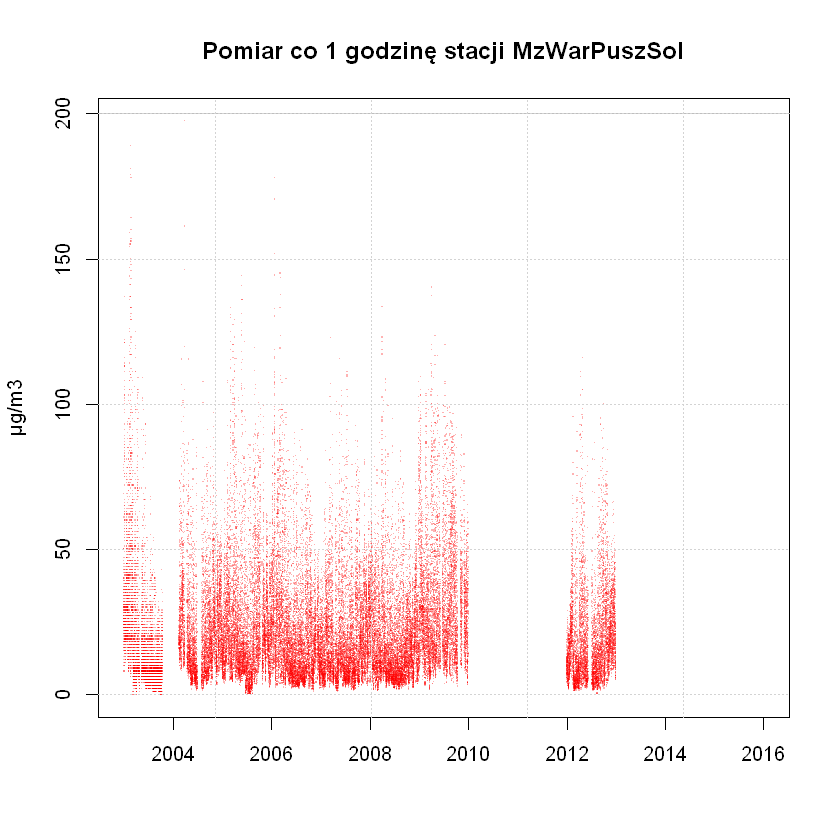

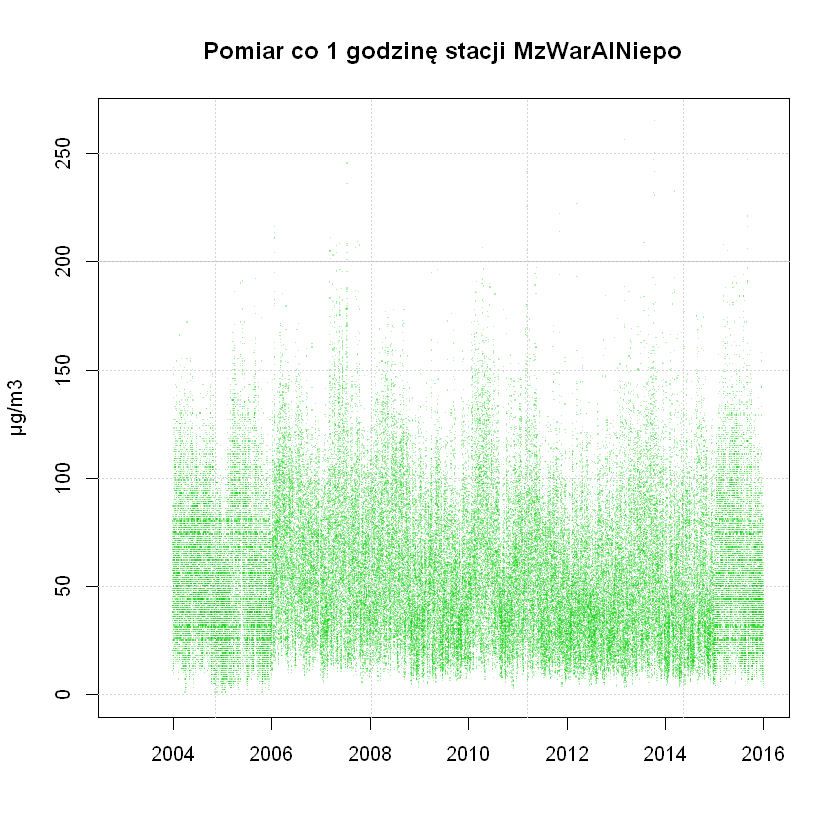

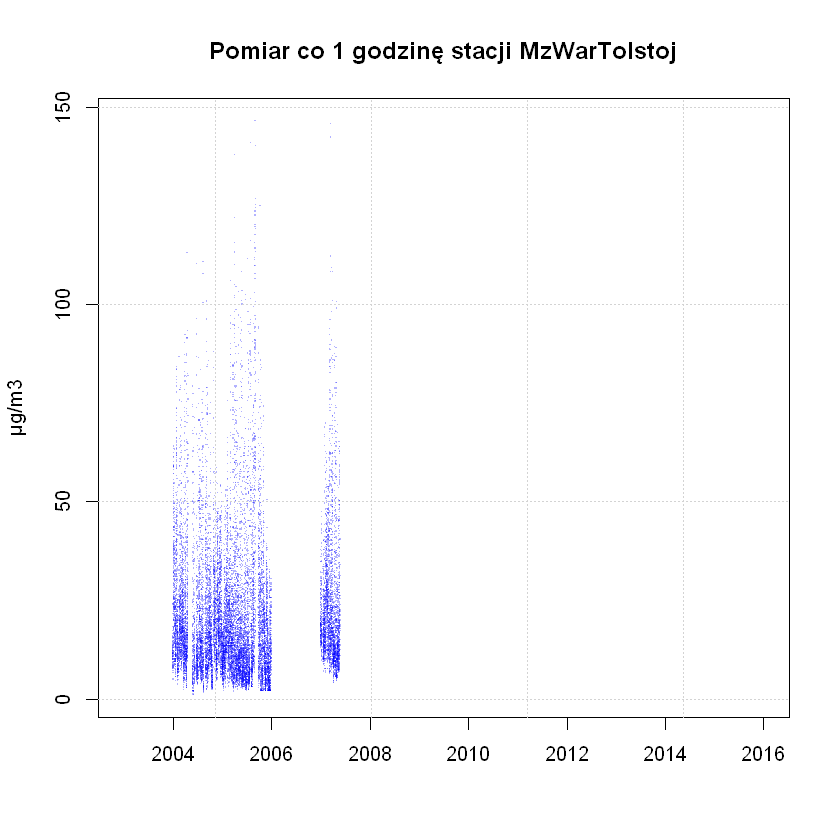

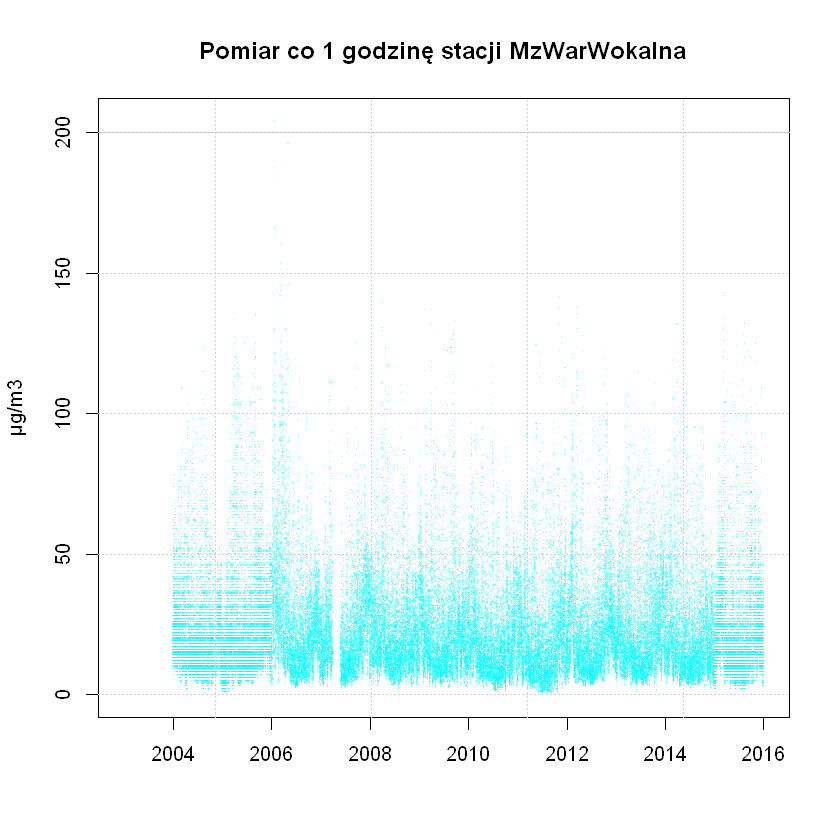

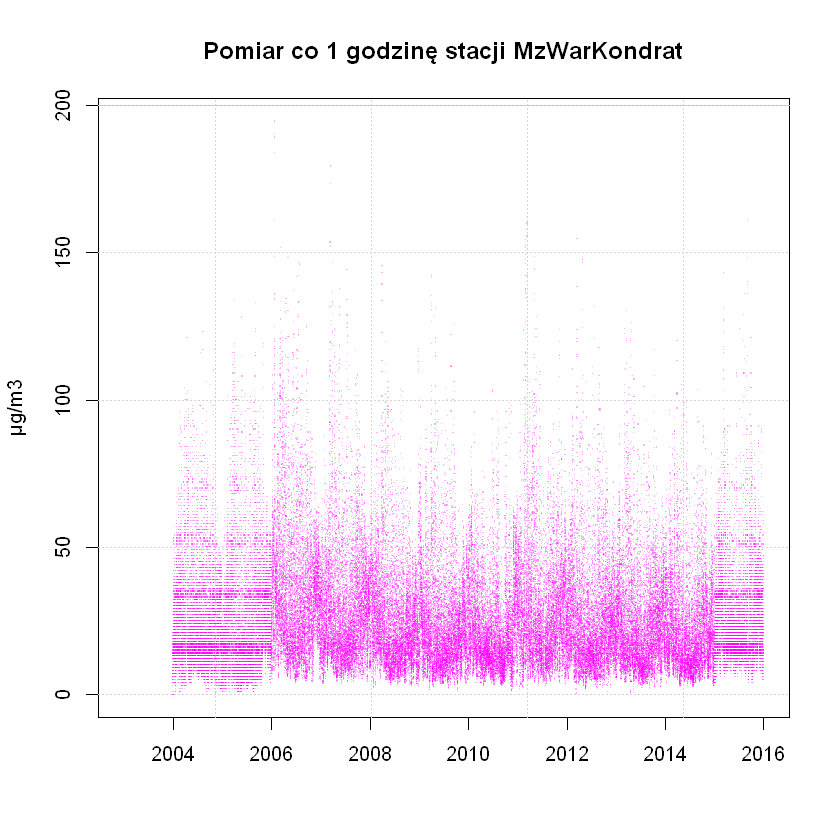

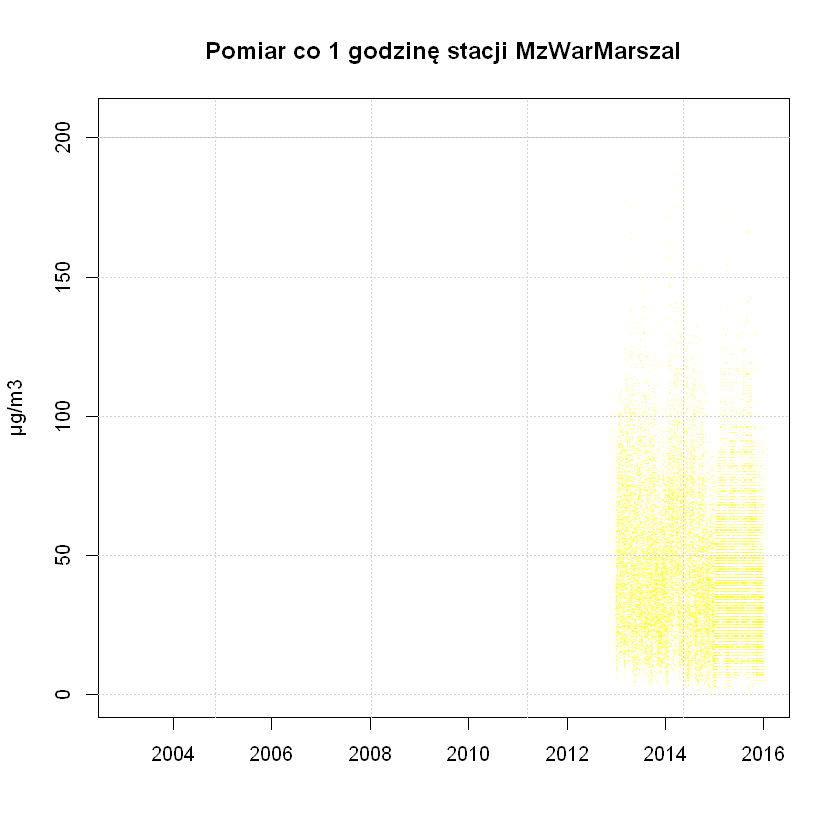

In [7]:
# Opracowanie danych o NO2
smog_warszawa_NO2_ujednolicone<-ujednolicenie_nazw( lista_zbiorow = smog_warszawa_NO2,  stare_nazwy = as.character(stacje$KOD.STARY[stacje$MIEJSCOWOSC=="Warszawa"]), nowe_nazwy = as.character(stacje$KOD.NOWY[stacje$MIEJSCOWOSC=="Warszawa"]))
smog_warszawa_NO2_uzupelnione<-dodawanie_stacji(smog_warszawa_NO2_ujednolicone)
smog_warszawa_NO2_polaczone<-do.call(rbind,  smog_warszawa_NO2_uzupelnione)
smog_warszawa_NO2_polaczone<-transformacja_daty(smog_warszawa_NO2_polaczone)
nazwy_stacji_wykres<-colnames(smog_warszawa_NO2_polaczone)[!colnames(smog_warszawa_NO2_polaczone)%in% c("DATA", "rok","miesiac","dzien", "godzina","minuta","data_pelna")] 
kolory <- 1:length(nazwy_stacji_wykres)
kolory_transparent <- adjustcolor(kolory, alpha.f = 0.3) 
plot(smog_warszawa_NO2_polaczone$data_pelna, smog_warszawa_NO2_polaczone[,nazwy_stacji_wykres[1]], pch = ".", ylab="µg/m3", xlab="", col=kolory_transparent[1], ylim=c(0,250), main="Pomiar NO2 co godzinę na wszystkich stacjach w Warszawie")
    grid()
for ( i in 2: length(nazwy_stacji_wykres)) {
  points(smog_warszawa_NO2_polaczone$data_pelna, smog_warszawa_NO2_polaczone[,nazwy_stacji_wykres[i]], pch = ".", col=kolory_transparent[i], ylim=c(0,250))
}
  abline( h = 200, col="black", lwd=3, lty=3)
for (W in nazwy_stacji_wykres){
  plot(smog_warszawa_NO2_polaczone$data_pelna, smog_warszawa_NO2_polaczone[,W], pch = ".", main=paste( "Pomiar co 1 godzinę stacji", W), ylab="µg/m3", xlab="", col=kolory_transparent[which( nazwy_stacji_wykres==W)])
    abline( h = 200, col="black", lwd=3, lty=3)
    grid()
}

# PM10

Dopuszczalne stężenie w ciągu 24 godzin: __50 µg/m3__

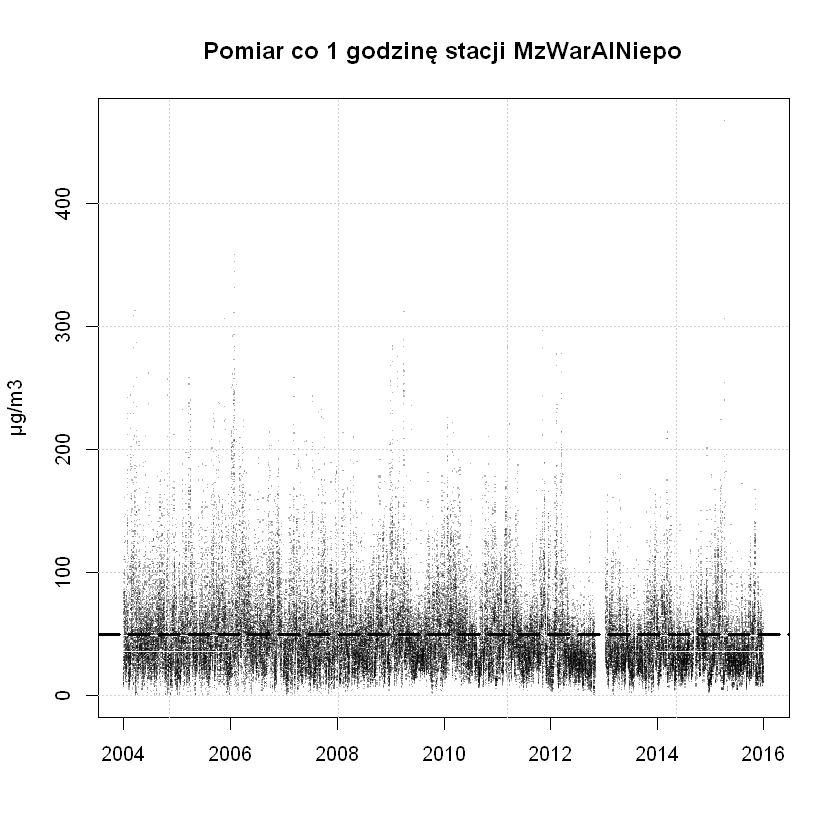

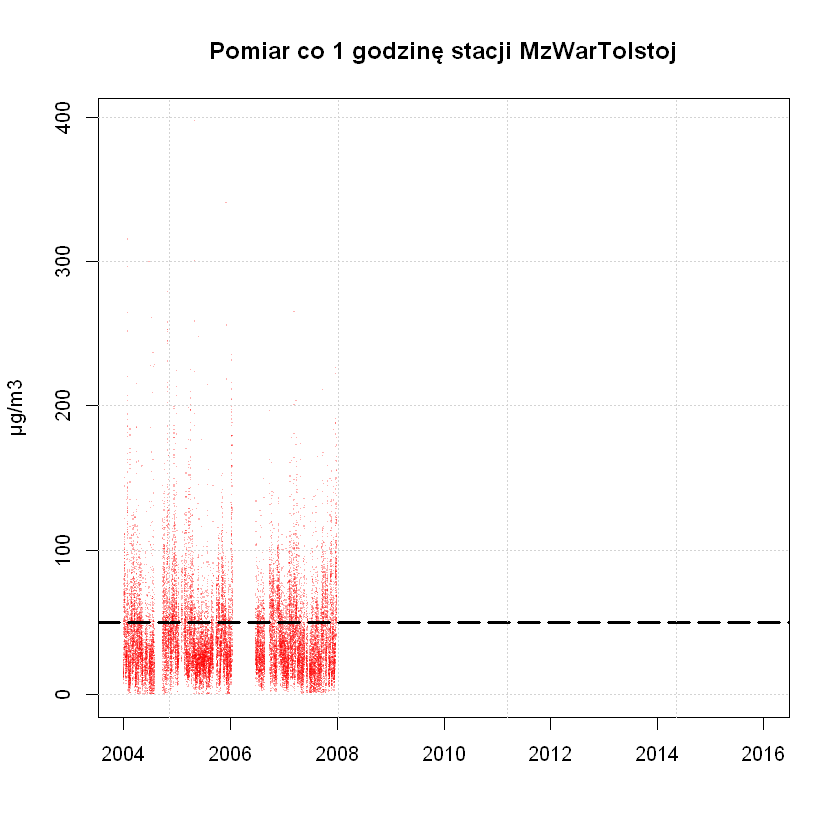

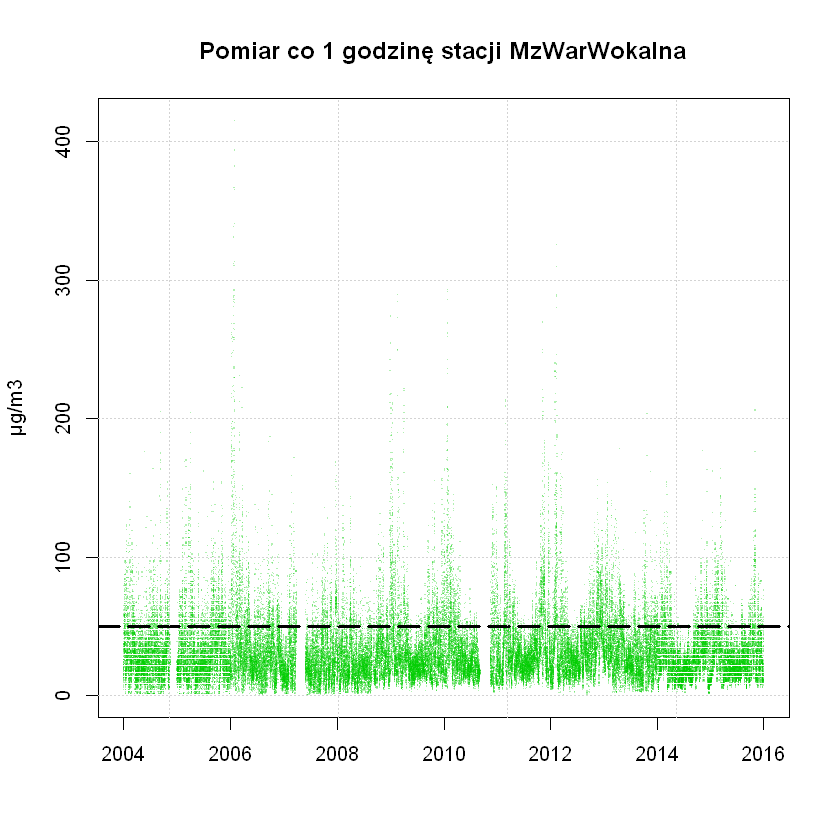

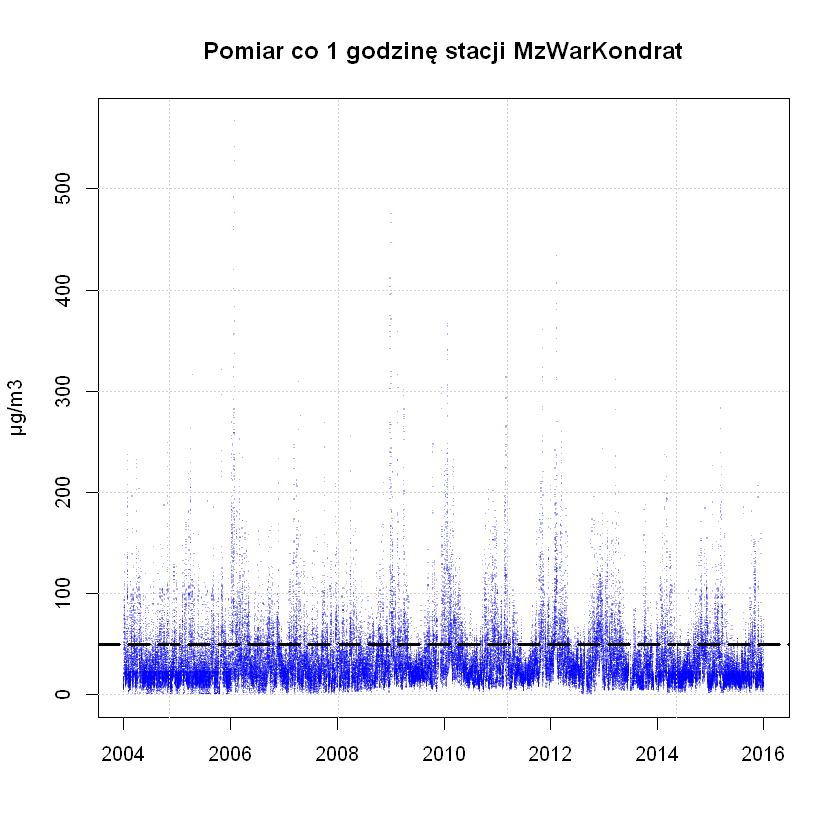

png 
  2

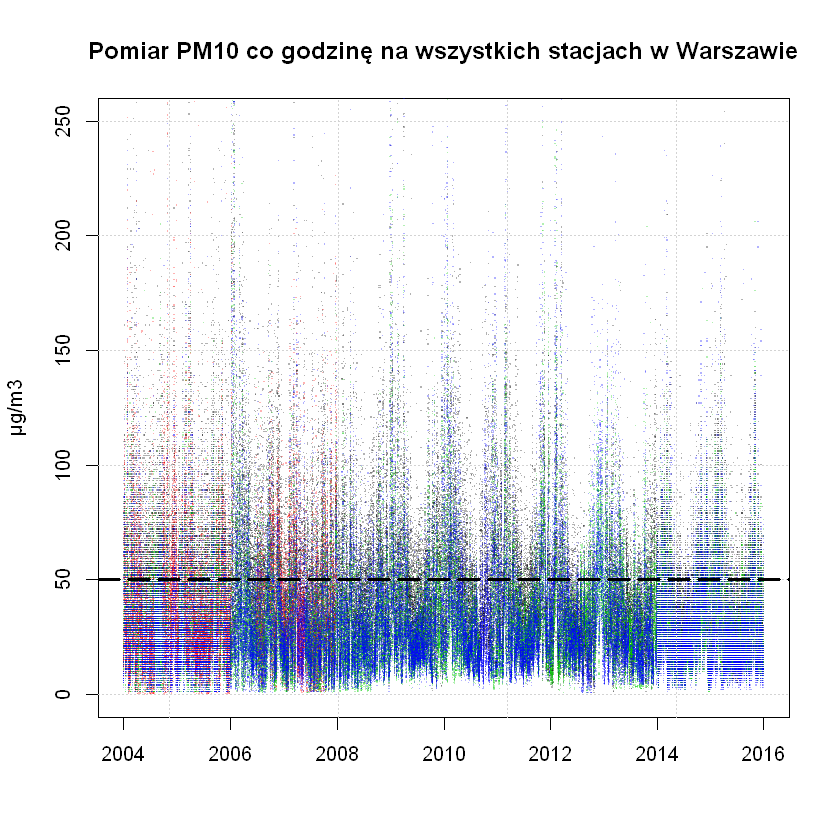

In [20]:
# Opracowanie danych o PM10
smog_warszawa_PM10_ujednolicone<-ujednolicenie_nazw( lista_zbiorow = smog_warszawa_PM10,  stare_nazwy = as.character(stacje$KOD.STARY[stacje$MIEJSCOWOSC=="Warszawa"]), nowe_nazwy = as.character(stacje$KOD.NOWY[stacje$MIEJSCOWOSC=="Warszawa"]))
smog_warszawa_PM10_uzupelnione<-dodawanie_stacji(smog_warszawa_PM10_ujednolicone)
smog_warszawa_PM10_polaczone<-do.call(rbind,  smog_warszawa_PM10_uzupelnione)
smog_warszawa_PM10_polaczone<-transformacja_daty(smog_warszawa_PM10_polaczone)
nazwy_stacji_wykres<-colnames(smog_warszawa_PM10_polaczone)[!colnames(smog_warszawa_PM10_polaczone)%in% c("DATA", "rok","miesiac","dzien", "godzina","minuta","data_pelna")] 
kolory <- 1:length(nazwy_stacji_wykres)
kolory_transparent <- adjustcolor(kolory, alpha.f = 0.3) 
for (W in nazwy_stacji_wykres){
  plot(smog_warszawa_PM10_polaczone$data_pelna, smog_warszawa_PM10_polaczone[,W], main=paste( "Pomiar co 1 godzinę stacji", W), ylab="µg/m3", xlab="", col=kolory_transparent[which( nazwy_stacji_wykres==W)], pch=".")
  abline( h = 50, col="black", lwd=3, lty=5)
  grid()
}
plot(smog_warszawa_PM10_polaczone$data_pelna, smog_warszawa_PM10_polaczone[,nazwy_stacji_wykres[1]], pch=".", ylab="µg/m3", xlab="", col=kolory_transparent[1], ylim=c(0,250), main="Pomiar PM10 co godzinę na wszystkich stacjach w Warszawie")
for ( i in 2: length(nazwy_stacji_wykres)) {
  points(smog_warszawa_PM10_polaczone$data_pelna, smog_warszawa_PM10_polaczone[,nazwy_stacji_wykres[i]], pch=".", col=kolory_transparent[i], ylim=c(0,250))
}
  grid()
  abline( h = 50, col="black", lwd=3, lty=5)
jpeg("SMOG_PM10.jpg", width = 15, height = 15, units = "cm", res=100)
plot(smog_warszawa_PM10_polaczone$data_pelna, smog_warszawa_PM10_polaczone[,nazwy_stacji_wykres[1]], pch=".", ylab="µg/m3", xlab="", col="grey30", ylim=c(0,250), main="Pomiar PM10 co 1 godzinę na wszystkich stacjach w Warszawie")
grid()
for ( i in 2: length(nazwy_stacji_wykres)) {
  points(smog_warszawa_PM10_polaczone$data_pelna, smog_warszawa_PM10_polaczone[,nazwy_stacji_wykres[i]], pch=".", col="grey30", ylim=c(0,250))
}
dev.off()

## Średnie stężenia PM10 dla poszczególnych stacji w kolejnych latach

__Dopuszczalne średnie zanieczyszczenie powietrza PM10 w skali roku wynosi 40 µg/m3__

In [13]:
# Srednioroczne stężęnie PM10 dla stacji MzWarAlNiepo
aggregate( MzWarAlNiepo ~ rok,data = smog_warszawa_PM10_polaczone, mean, na.rm = TRUE)
# Srednioroczne stężęnie PM10 dla stacji MzWarTolstoj
aggregate( MzWarTolstoj ~ rok,data = smog_warszawa_PM10_polaczone, mean, na.rm = TRUE)
# Srednioroczne stężęnie PM10 dla stacji MzWarWokalna
aggregate( MzWarWokalna ~ rok,data = smog_warszawa_PM10_polaczone, mean, na.rm = TRUE)
# Srednioroczne stężęnie PM10 dla stacji MzWarKondrat
aggregate( MzWarKondrat ~ rok,data = smog_warszawa_PM10_polaczone, mean, na.rm = TRUE)

rok,MzWarAlNiepo
2004,50.77794
2005,51.97007
2006,59.33347
2007,47.11801
2008,47.41136
2009,50.41995
2010,52.42001
2011,49.12239
2012,38.54985
2013,39.73570


rok,MzWarTolstoj
2004,44.12203
2005,37.20633
2006,42.31734
2007,37.62236
2008,177.90000


rok,MzWarWokalna
2004,31.41228
2005,32.82227
2006,36.53872
2007,27.64991
2008,28.04382
2009,33.90578
2010,34.99988
2011,35.90716
2012,37.18324
2013,33.75635


rok,MzWarKondrat
2004,32.65954
2005,32.20283
2006,39.38604
2007,31.75636
2008,32.02873
2009,36.52497
2010,41.39877
2011,36.59419
2012,42.11939
2013,31.95434
